In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadhananasghar/oace-open-and-close-eyes-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/ashokpaudelapril/.cache/kagglehub/datasets/muhammadhananasghar/oace-open-and-close-eyes-dataset/versions/1


In [28]:
import os

# Save current directory (optional)
original_dir = os.getcwd()

In [29]:
import shutil

# Define destination dataset folder inside original_dir
dataset_dir = os.path.join(original_dir, "dataset")

# Create the dataset folder if it doesn't exist
os.makedirs(dataset_dir, exist_ok=True)

# Copy all files and subfolders from dataset_path to dataset_dir
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(dataset_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print(f"Dataset contents copied to: {dataset_dir}")


Dataset contents copied to: /Users/ashokpaudelapril/Drowsiness_Detection/dataset


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [31]:
# === CONFIG ===
dataset_path = "dataset/OACE"  # Change if your folder is named differently
img_size = (64, 64)
batch_size = 32
epochs = 10

In [32]:
# === LOAD DATA ===
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)


Found 97860 files belonging to 2 classes.
Using 78288 files for training.
Found 97860 files belonging to 2 classes.
Using 19572 files for validation.


In [33]:
# === PREFETCH FOR PERFORMANCE ===
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [34]:
# === BUILD MODEL ===
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=img_size + (3,)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
# === TRAIN MODEL ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 88s 36ms/step - accuracy: 0.9153 - loss: 0.2019 - val_accuracy: 0.9837 - val_loss: 0.0487
Epoch 2/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9851 - loss: 0.0417 - val_accuracy: 0.9922 - val_loss: 0.0194
Epoch 3/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 94s 38ms/step - accuracy: 0.9914 - loss: 0.0241 - val_accuracy: 0.9934 - val_loss: 0.0175
Epoch 4/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 95s 39ms/step - accuracy: 0.9940 - loss: 0.0162 - val_accuracy: 0.9942 - val_loss: 0.0161
Epoch 5/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9952 - loss: 0.0131 - val_accuracy: 0.9946 - val_loss: 0.0183
Epoch 6/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 100s 41ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9965 - val_loss: 0.0121
Epoch 7/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 100s 41ms/step - accuracy: 0.9971 - loss: 0.0088 - val_accuracy: 0.9970 - val_loss: 0.0092
Epoch 8/10
2447/2447 ━━━━━━━━━━━━━━━━━━━━ 102s 42ms/step - accuracy: 0.996

In [36]:
# === SAVE MODEL ===
from keras.saving import save_model
save_model(model, "drowsiness_detector_model.keras")


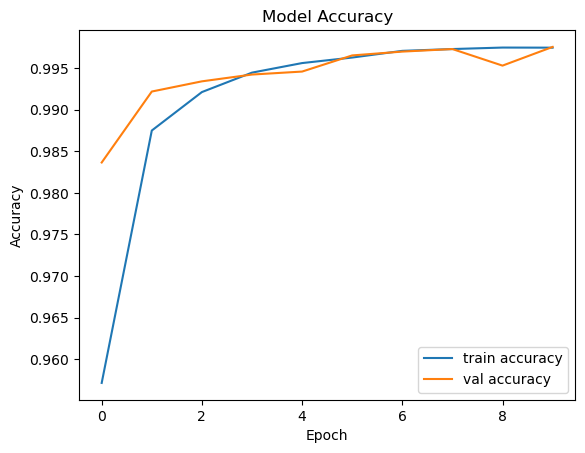

In [37]:
# === PLOT TRAINING HISTORY ===
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()